In [1]:
import os
import random
import sqlite3
import datetime

import numpy as np
import pandas as pd

In [2]:
con_pharma = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb-Pharma.sqlite"))

In [3]:
tweet_df = pd.read_sql_query(f"SELECT * from pharma_tweets_count", con_pharma)

In [4]:
len(tweet_df['tweetDate'].unique())

744

In [5]:
tweet_df.describe()

,count
count,313407.000000
mean,21.106427
std,415.587038
min,1.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,136970.000000


<AxesSubplot:>

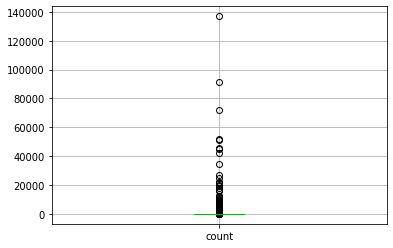

In [6]:
tweet_df.boxplot()

In [7]:
tweet_df = pd.read_sql_query(f"SELECT * from pharma_tweets_count WHERE count > 15", con_pharma)

In [8]:
tweet_df.describe()

,count
count,52594.000000
mean,82.026410
std,1012.277493
min,16.000000
25%,20.000000
50%,20.000000
75%,40.000000
max,136970.000000


In [9]:
tweet_df['count'] = tweet_df['count'].apply(lambda x: 50 if x > 50 else x) 

In [10]:
tweet_df.describe()

,count
count,52594.000000
mean,29.050082
std,11.985823
min,16.000000
25%,20.000000
50%,20.000000
75%,40.000000
max,50.000000


<AxesSubplot:>

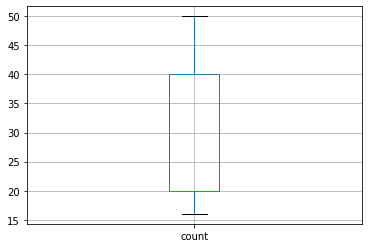

In [11]:
tweet_df.boxplot()

In [12]:
len(tweet_df['tweetDate'].unique())

744

In [13]:
def write_to_db(con, df):
    cursor = con.cursor()
    
    try:
        cursor.execute('''CREATE TABLE IF NOT EXISTS reduced_tweet_counts (
              category TEXT, 
              tweetDate DATE, 
              count INTEGER, 
              tweet TEXT, 
              CONSTRAINT uniq_val PRIMARY KEY (category, tweetDate, tweet))''')
        con.commit()
        
        df.to_sql('reduced_tweet_counts', con, if_exists='replace', index=False)
        con.commit()
        
    except sqlite3.Error as error:
        print({error})
    
    finally:
        cursor.close()
        con.close()

In [14]:
write_to_db(con_pharma, tweet_df)